# Sport Statistic Analysis
## Andrew Ashdown
### *December 20202*

## Import Libraires

In [95]:
#from __future__ import print_function
import requests
import pandas as pd
from tqdm.notebook import tqdm
import time
import sys
import logging

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Dataset and check table

In [96]:
stats = pd.read_csv('./Kaggle/zaeemnalla  prem league/stats.csv')

In [97]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,5.0,1.0,72.0,11.0,9.0,80.0,16.0,27.0,2.0,81.0,254.0,890.0,1.0,1222.0,NaN,1.0,5.0,3.0,18723.0,NaN,2397.0,NaN,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,3.0,6.0,41.0,23.0,6.0,127.0,22.0,24.0,4.0,74.0,292.0,982.0,0.0,1206.0,NaN,1.0,3.0,2.0,16759.0,NaN,2270.0,NaN,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,6.0,1.0,46.0,11.0,3.0,120.0,20.0,27.0,1.0,65.0,246.0,969.0,2.0,1115.0,NaN,0.0,1.0,1.0,17154.0,NaN,2800.0,NaN,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,10.0,3.0,53.0,10.0,7.0,111.0,12.0,35.0,6.0,73.0,214.0,998.0,1.0,1202.0,NaN,1.0,3.0,3.0,18458.0,NaN,2045.0,NaN,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,6.0,2.0,44.0,13.0,9.0,149.0,6.0,54.0,11.0,128.0,276.0,995.0,2.0,1412.0,NaN,2.0,7.0,6.0,14914.0,NaN,2408.0,NaN,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


## Drop columns containing null values

In [98]:
stats = stats.drop(['big_chance_missed','backward_pass','total_through_ball','head_clearance','saves','dispossessed'],axis=1)

In [99]:
stats.describe()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,14.150000,14.150000,51.062500,61.079167,2.862500,514.241667,168.116667,12.283333,9.016667,3.650000,1.495833,43.341667,7.741667,2.983333,86.291667,10.945833,51.062500,132.133333,555.179167,762.133333,5.900000,1252.416667,1.966667,4.750000,3.650000,15691.908333,2286.150000,831.370833,207.191667,23908.962500,4.991667,0.837500,54.920833,22.783333
std,6.022482,5.596846,16.203474,10.078249,1.802442,95.979164,38.748882,4.820950,3.659077,2.052246,1.335069,14.324684,3.659105,2.418490,20.736198,4.150060,13.209617,31.941744,141.363020,104.704200,5.436434,327.233390,1.471818,2.262113,1.930378,3176.276737,295.618128,118.551756,35.933177,3247.161627,2.804646,0.947718,18.780999,9.148869
min,1.000000,2.000000,20.000000,38.000000,0.000000,338.000000,94.000000,4.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,38.000000,2.000000,22.000000,53.000000,198.000000,508.000000,0.000000,588.000000,0.000000,0.000000,0.000000,9478.000000,1462.000000,572.000000,136.000000,16772.000000,0.000000,0.000000,19.000000,4.000000
25%,10.000000,10.000000,40.000000,54.000000,1.000000,441.000000,140.000000,9.000000,6.000000,2.000000,1.000000,33.000000,5.000000,1.000000,73.000000,8.000000,41.000000,109.750000,472.250000,685.750000,2.000000,1022.000000,1.000000,3.000000,2.000000,13379.750000,2070.000000,749.000000,180.000000,21577.000000,3.000000,0.000000,40.000000,17.000000
50%,12.000000,15.000000,47.000000,60.500000,3.000000,498.500000,158.500000,11.500000,9.000000,3.500000,1.000000,40.000000,7.000000,2.000000,85.000000,10.000000,51.000000,132.000000,558.500000,747.500000,4.000000,1176.500000,2.000000,5.000000,3.000000,14937.000000,2276.500000,818.000000,201.000000,23168.500000,5.000000,1.000000,53.000000,22.000000
75%,18.000000,19.000000,61.000000,67.000000,4.000000,572.000000,194.250000,15.000000,12.000000,5.000000,2.000000,52.000000,9.250000,4.000000,97.000000,14.000000,59.250000,154.000000,654.000000,826.500000,8.250000,1446.500000,3.000000,6.000000,5.000000,18250.250000,2470.500000,911.250000,230.000000,26294.000000,7.000000,1.000000,68.000000,27.000000
max,32.000000,29.000000,106.000000,94.000000,9.000000,834.000000,288.000000,33.000000,18.000000,11.000000,6.000000,94.000000,23.000000,12.000000,149.000000,24.000000,89.000000,225.000000,872.000000,1089.000000,26.000000,2220.000000,6.000000,13.000000,11.000000,28241.000000,3176.000000,1156.000000,309.000000,35130.000000,16.000000,5.000000,118.000000,66.000000


In [100]:
stats.isna().sum()

team                    0
wins                    0
losses                  0
goals                   0
total_yel_card          0
total_red_card          0
total_scoring_att       0
ontarget_scoring_att    0
hit_woodwork            0
att_hd_goal             0
att_pen_goal            0
att_freekick_goal       0
att_ibox_goal           0
att_obox_goal           0
goal_fastbreak          0
total_offside           0
clean_sheet             0
goals_conceded          0
outfielder_block        0
interception            0
total_tackle            0
last_man_tackle         0
total_clearance         0
own_goals               0
penalty_conceded        0
pen_goals_conceded      0
total_pass              0
total_long_balls        0
total_cross             0
corner_taken            0
touches                 0
clearance_off_line      0
penalty_save            0
total_high_claim        0
punches                 0
season                  0
dtype: int64

## Explore the distrubution of the Data

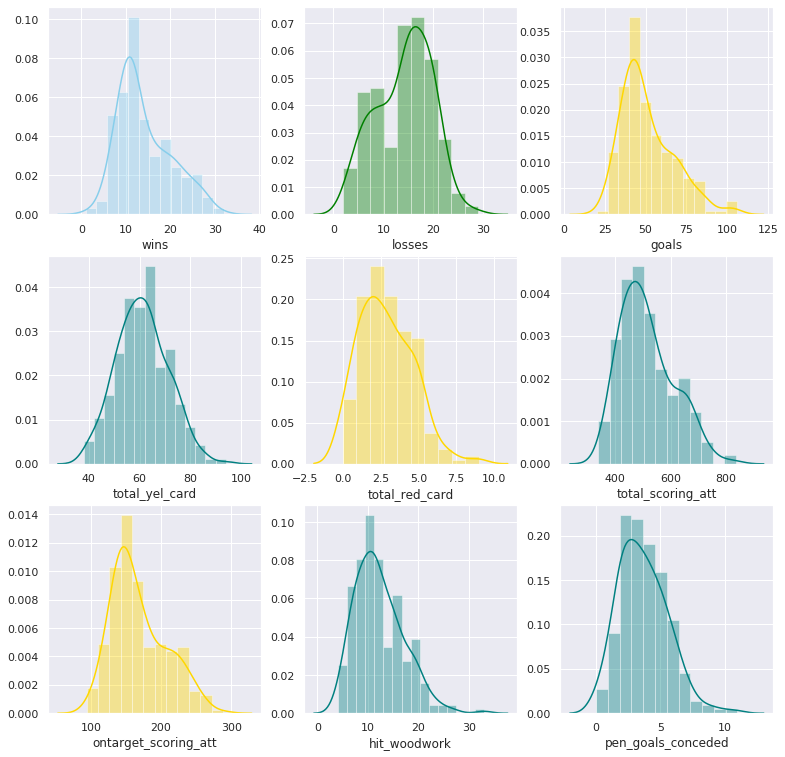

In [130]:
f, axes = plt.subplots(3, 3, figsize=(13, 13), sharex=False)
sns.distplot( stats["wins"] , color="skyblue", ax=axes[0, 0])
sns.distplot( stats["losses"] , color="green", ax=axes[0, 1])
sns.distplot( stats["goals"] , color="gold", ax=axes[0, 2])
sns.distplot( stats["total_yel_card"] , color="teal", ax=axes[1, 0])
sns.distplot( stats["total_red_card"] , color="gold", ax=axes[1, 1])
sns.distplot( stats["total_scoring_att"] , color="teal", ax=axes[1, 2])
sns.distplot( stats["ontarget_scoring_att"] , color="gold", ax=axes[2, 0])
sns.distplot( stats["hit_woodwork"] , color="teal", ax=axes[2, 1])
sns.distplot( stats["pen_goals_conceded"] , color="teal", ax=axes[2, 2])

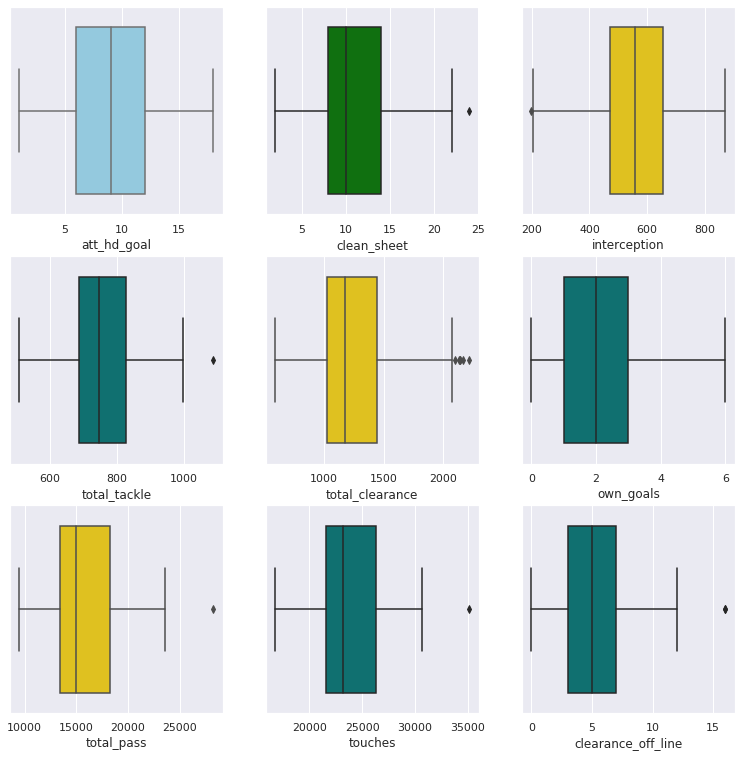

In [131]:
f, axes = plt.subplots(3, 3, figsize=(13, 13), sharex=False)
sns.boxplot( stats["att_hd_goal"] , color="skyblue", ax=axes[0, 0])
sns.boxplot( stats["clean_sheet"] , color="green", ax=axes[0, 1])
sns.boxplot( stats["interception"] , color="gold", ax=axes[0, 2])
sns.boxplot( stats["total_tackle"] , color="teal", ax=axes[1, 0])
sns.boxplot( stats["total_clearance"] , color="gold", ax=axes[1, 1])
sns.boxplot( stats["own_goals"] , color="teal", ax=axes[1, 2])
sns.boxplot( stats["total_pass"] , color="gold", ax=axes[2, 0])
sns.boxplot( stats["touches"] , color="teal", ax=axes[2, 1])
sns.boxplot( stats["clearance_off_line"] , color="teal", ax=axes[2, 2])

## Explore the Correlation of the Data

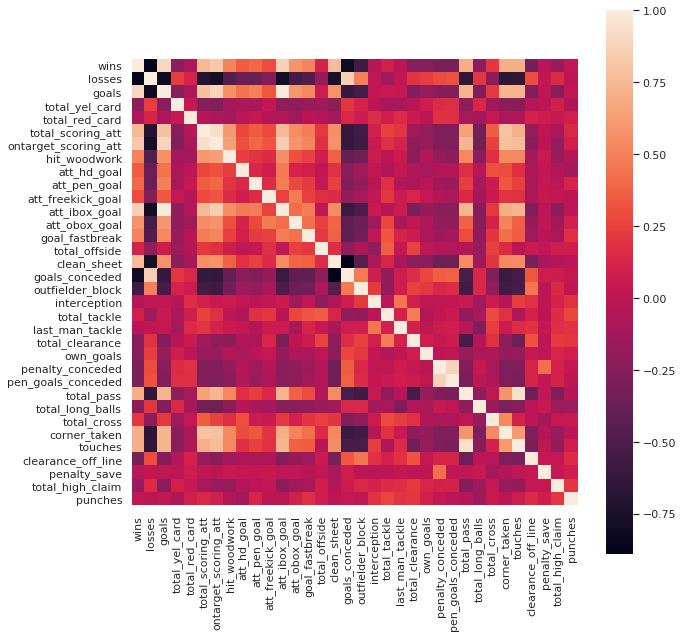

In [103]:
corr = stats.select_dtypes(include = ['float64', 'int64']).corr()
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10))    
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [104]:
columns = ['wins','total_scoring_att', 'ontarget_scoring_att','total_pass',
           'corner_taken', 'touches','hit_woodwork','goals']

In [105]:
data_for_model = stats[columns]

In [106]:
data_for_model

,wins,total_scoring_att,ontarget_scoring_att,total_pass,corner_taken,touches,hit_woodwork,goals
0,28.0,698.0,256.0,18723.0,258.0,25686.0,21.0,83.0
1,24.0,636.0,216.0,16759.0,231.0,24010.0,14.0,64.0
2,20.0,668.0,214.0,17154.0,282.0,24150.0,15.0,57.0
3,19.0,638.0,226.0,18458.0,278.0,25592.0,19.0,63.0
4,17.0,520.0,184.0,14914.0,181.0,22200.0,6.0,57.0
5,16.0,404.0,120.0,12400.0,217.0,18932.0,7.0,47.0
6,16.0,419.0,132.0,11232.0,280.0,18017.0,8.0,52.0
7,15.0,478.0,155.0,14033.0,205.0,20812.0,5.0,52.0
8,15.0,465.0,153.0,12274.0,208.0,19250.0,9.0,52.0
9,14.0,525.0,186.0,12616.0,247.0,19377.0,9.0,45.0


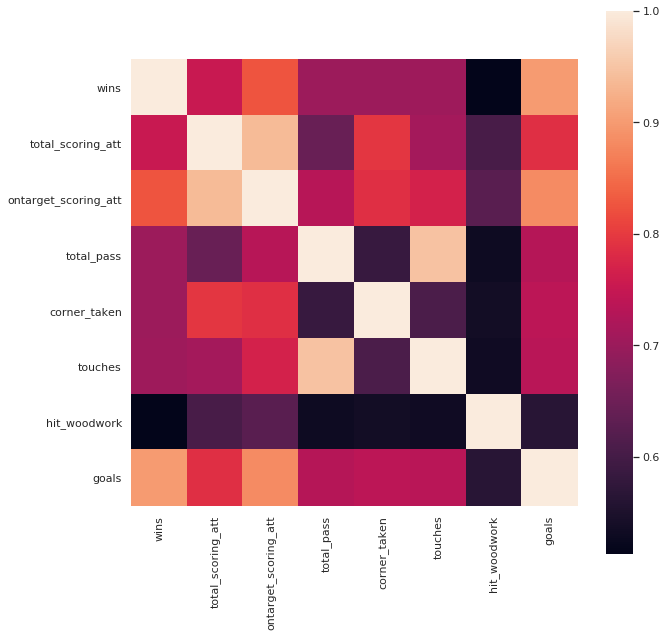

In [107]:
corr = data_for_model.select_dtypes(include = ['float64', 'int64']).corr()
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10))    
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [108]:
corr_list = corr['goals'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

wins                    0.899236
ontarget_scoring_att    0.882988
total_scoring_att       0.788062
corner_taken            0.737691
touches                 0.733838
total_pass              0.730479
hit_woodwork            0.564536
Name: goals, dtype: float64

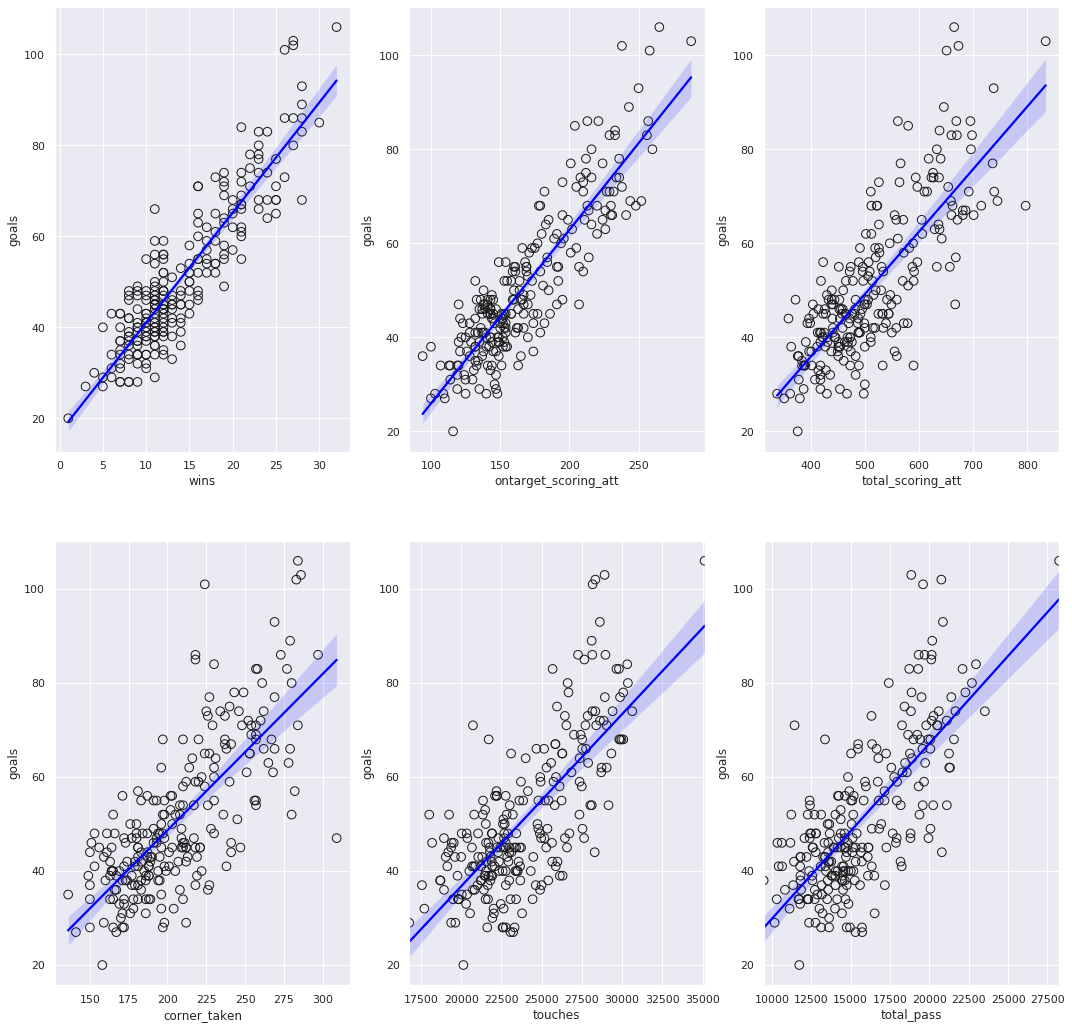

In [128]:
plt.figure(figsize=(18,18))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(data_for_model[feature], data_for_model['goals'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'goals', data = data_for_model,scatter=False, color = 'Blue')
    ax=plt.gca() 
    #ax.set_ylim([0,33000])

## Now to build a predictive model

In [110]:
transformer = StandardScaler().fit(data_for_model.iloc[:,:-1])
x_standardized = transformer.transform(data_for_model.iloc[:,:-1])

In [111]:
full_standardized = pd.DataFrame(x_standardized,columns=data_for_model.columns.tolist()[:-1])
full_standardized.head()
X = full_standardized
y = data_for_model['goals']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## K Nearest Neighbour Model

In [113]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [114]:
knn_predictions = knn_model.predict(X_test)
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   5.60
The mean squared error of the model in the test set is:  54.64
The root mean squared error of the model in the test set is:   7.39
The R2 of the model in the test set is: 0.83


## Linear Regression Model

In [115]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)
lm_predictions = lm_model.predict(X_test)
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   4.77
The mean squared error of the model in the test set is:  38.55
The root mean squared error of the model in the test set is:   6.21
The R2 of the model in the test set is: 0.88


## KNN Distance Model

In [116]:
distance_model = KNeighborsRegressor(n_neighbors=9, weights = "distance")
distance_model.fit(X_train, y_train)
distance_predictions = distance_model.predict(X_test)

MAE = mean_absolute_error(y_test,distance_predictions)
MSE = mean_squared_error(y_test,distance_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,distance_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   5.87
The mean squared error of the model in the test set is:  59.91
The root mean squared error of the model in the test set is:   7.74
The R2 of the model in the test set is: 0.81


## Experimenting with different K values

In [117]:
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

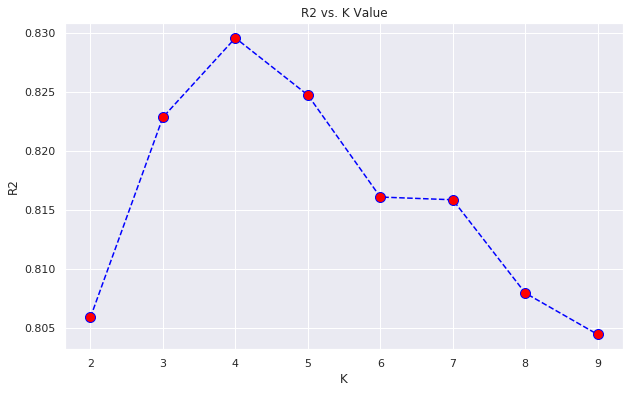

In [118]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [119]:
uniform_model = KNeighborsRegressor(n_neighbors=9)
uniform_model.fit(X_train, y_train)
uniform_predictions = uniform_model.predict(X_test)

MAE = mean_absolute_error(y_test,uniform_predictions)
MSE = mean_squared_error(y_test,uniform_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,uniform_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   6.02
The mean squared error of the model in the test set is:  62.68
The root mean squared error of the model in the test set is:   7.92
The R2 of the model in the test set is: 0.80


In [121]:
distance_model = KNeighborsRegressor(n_neighbors=4, weights = "distance")
distance_model.fit(X_train, y_train)
distance_predictions = distance_model.predict(X_test)

MAE = mean_absolute_error(y_test,distance_predictions)
MSE = mean_squared_error(y_test,distance_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,distance_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   5.55
The mean squared error of the model in the test set is:  53.54
The root mean squared error of the model in the test set is:   7.32
The R2 of the model in the test set is: 0.83


## Now to try using the GradientBoostingRegressor

In [122]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [123]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [124]:
clf.score(X_test,y_test)

0.831754420145

## Exploring the Predictions

In [125]:
actuals = y_test.reset_index(drop=True)

In [126]:
for i in range(25):
    print('Prediction: ', round(lm_predictions[i],2), ' , Actual: ', actuals[i], ' Accuracy: ', 
          round(lm_predictions[i]/actuals[i],2))

Prediction:  44.89  , Actual:  44.0  Accuracy:  1.02
Prediction:  45.07  , Actual:  33.0  Accuracy:  1.37
Prediction:  75.89  , Actual:  78.0  Accuracy:  0.97
Prediction:  39.7  , Actual:  41.0  Accuracy:  0.97
Prediction:  85.4  , Actual:  86.0  Accuracy:  0.99
Prediction:  75.36  , Actual:  68.0  Accuracy:  1.11
Prediction:  48.05  , Actual:  48.0  Accuracy:  1.0
Prediction:  58.32  , Actual:  58.0  Accuracy:  1.01
Prediction:  54.73  , Actual:  55.0  Accuracy:  1.0
Prediction:  63.6  , Actual:  71.0  Accuracy:  0.9
Prediction:  38.85  , Actual:  38.0  Accuracy:  1.02
Prediction:  61.97  , Actual:  73.0  Accuracy:  0.85
Prediction:  36.53  , Actual:  37.0  Accuracy:  0.99
Prediction:  36.7  , Actual:  42.0  Accuracy:  0.87
Prediction:  43.14  , Actual:  44.0  Accuracy:  0.98
Prediction:  43.79  , Actual:  40.0  Accuracy:  1.09
Prediction:  55.56  , Actual:  59.0  Accuracy:  0.94
Prediction:  57.38  , Actual:  58.0  Accuracy:  0.99
Prediction:  33.97  , Actual:  28.0  Accuracy:  1.21
